<a href="https://colab.research.google.com/github/nikhilv2/EY-isolve4abillion-FInal/blob/main/VaccineEfficacyModel_Semifinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
### Importing the Required Libraries

import lightgbm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [143]:
### Reading the Dataset - Vaccinated People

data_one = pd.read_csv("/content/DataOutput1 - Vaccine Efficacy.csv")      # Dataset of Vaccinated People

### Reading the Dataset - Gathered from Vaccinated People

data_two = pd.read_csv("/content/DataOutput1 - Vaccine Efficacy.csv")     # Dataset gathered from Vaccinated people
data_two.head()

,Aadhar Number,Name,District,Male,Female,Others,0-18,19-35,36-50,51-60,60 above,Obese Yes,Obese No,Heart Disease Yes,Heart Diseases No,Lung Problem Yes,Lung Problem No,Muscle Pain,Tiredness,Headache,Mild Allergies,Fever,None,Covid Positive,Covid Negative
0,521452875412,Piyush M,Palakkad,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
1,548765481065,Jasmine S,Trivandrum,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
2,665120304795,Sharadha L,Wayanadu,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1
3,402168730915,Sam Rony,Kottayam,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1
4,975410256133,R Kumar,Kasargod,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1


In [144]:
### Merging the Existing Dataset with Gathered Data 

data = pd.merge(data_one, data_two, how='outer')
data.head()

,Aadhar Number,Name,District,Male,Female,Others,0-18,19-35,36-50,51-60,60 above,Obese Yes,Obese No,Heart Disease Yes,Heart Diseases No,Lung Problem Yes,Lung Problem No,Muscle Pain,Tiredness,Headache,Mild Allergies,Fever,None,Covid Positive,Covid Negative
0,521452875412,Piyush M,Palakkad,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
1,548765481065,Jasmine S,Trivandrum,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
2,665120304795,Sharadha L,Wayanadu,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1
3,402168730915,Sam Rony,Kottayam,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1
4,975410256133,R Kumar,Kasargod,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1


In [145]:
### Filling in null values with zero

data = data.fillna(0)
data = data.astype({"Male":'int', "Female":'int', "Others":"int", "0-18":"int", "19-35":"int","36-50":"int", "51-60":"int", "60 above":"int",
                    "Obese Yes":"int", "Obese No":"int", "Heart Disease Yes":"int", "Heart Diseases No":"int", "Lung Problem Yes":"int", "Lung Problem No":"int",
                    "Muscle Pain":"int", "Tiredness":"int", "Headache":'int', "Mild Allergies":"int", "Fever":"int", "None":"int",
                    "Covid Positive":"int", "Covid Negative":"int"})
data.head()

,Aadhar Number,Name,District,Male,Female,Others,0-18,19-35,36-50,51-60,60 above,Obese Yes,Obese No,Heart Disease Yes,Heart Diseases No,Lung Problem Yes,Lung Problem No,Muscle Pain,Tiredness,Headache,Mild Allergies,Fever,None,Covid Positive,Covid Negative
0,521452875412,Piyush M,Palakkad,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
1,548765481065,Jasmine S,Trivandrum,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
2,665120304795,Sharadha L,Wayanadu,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1
3,402168730915,Sam Rony,Kottayam,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1
4,975410256133,R Kumar,Kasargod,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1


In [146]:
### Separating the Dataset to Features and Targets

y = data.iloc[:, [23]]
x = data.iloc[:, [3,4,5,6,7,8,9,10,11,13,15,17,18,19,20,21,22]]
y.head()

,Covid Positive
0,0
1,0
2,0
3,0
4,0


In [147]:
### Splitting into Train and Test Sets

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.85, random_state = 0)

In [148]:
### Buliding the model

import lightgbm as ltb
model = ltb.LGBMClassifier(learning_rate = 7)
model = model.fit(xtrain, ytrain)
print(model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=7, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [149]:
### Predicting the Model

ypred = model.predict(xtest)
ypred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [150]:
### Using confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
cm

array([[10,  2],
       [ 0,  3]])

In [151]:
### Predicting acccuracy

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, ypred)
accuracy

0.8666666666666667

In [152]:
### Obtaining the Learning Rate with best Accuracy
accuracy =[]
k_value = []
for k in range(100):
  if k%2 != 0:
    model = ltb.LGBMClassifier(learning_rate=k)
    model.fit(xtrain, ytrain) 
    ypred = model.predict(xtest)
    accu = accuracy_score(ytest, ypred)
    accuracy.append(accu)
    k_value.append(k)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


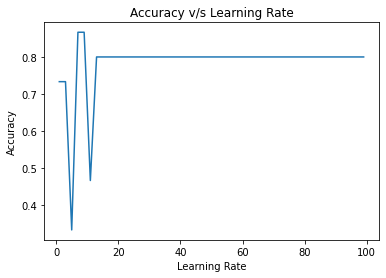

In [153]:
### Plotting accuracy values

import matplotlib.pyplot as plt
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy v/s Learning Rate')
plt.plot(k_value, accuracy)
plt.show()

In [154]:
### Calculating Efficacy

covid_test = y.groupby('Covid Positive')
covid_negative_group = covid_test.get_group(0)
covid_positive_group = covid_test.get_group(1)
efficacy = len(covid_negative_group)/len(y)*100
print('Efficacy in Kerala:',efficacy,'%')

Efficacy in Kerala: 82.82828282828282 %


In [155]:
### Predicting the Test Result by giving inputs

def expected_result():
  gender_m = input("Male:")
  gender_f = input("Female:")
  gender_o = input("Others:")
  age_18 = input("0-18:")
  age_35 = input("19-35:")
  age_50 = input("36-50:")
  age_60 = input("51-60:")
  age_old = input("60 Above:")
  obese = input("Obese: ")
  heart = input("Heart Disease: ")
  lung = input("Lung Problems: ")
  muscle_pain = input("Muscle Pain: ")
  tired = input("Tiredness: ")
  headache = input("Headache: ")
  mild_allergies = input("Mild Allergies: ")
  fever = input("Fever: ")
  none = input("None: ")
  
  result=model.predict([[gender_m, gender_f, gender_o, age_18, age_35, age_50, age_60, age_old, obese, heart,
                         lung, muscle_pain, tired, headache, none, fever, mild_allergies]])
  if result==0:
    print("The expected result will be negative.")
  else:
    print("The expected result will be positive.")  

In [156]:
expected_result()

Male:0
Female:1
Others:0
0-18:0
19-35:0
36-50:1
51-60:0
60 Above:0
Obese: 0
Heart Disease: 1
Lung Problems: 1
Muscle Pain: 0
Tiredness: 0
Headache: 0
Mild Allergies: 0
Fever: 1
None: 0
The expected result will be negative.


/usr/local/lib/python3.6/dist-packages/lightgbm/sklearn.py:599: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = _LGBMCheckArray(X, accept_sparse=True, force_all_finite=False)


In [157]:
### Dataframe with Preprocessed data of District

district_df = pd.DataFrame()
z = data.iloc[:, [3]]
district_df['District'] = data['District']
district_df['Preprocessed Value'] = z.apply(LabelEncoder().fit_transform)
district_df['Covid Positive'] = data['Covid Positive']
district_df.drop_duplicates()

### Obtaining Preprocessed Value by giving district as input

region = input()
m = district_df[district_df['District']==a]['Preprocessed Value'].values
b = m.tolist()
for i in b:
  district_data = i
o = int(district_data)
o

Kollam


1

In [158]:
### Calculating Vaccine Efficacy in any Region

area = district_df.groupby('Preprocessed Value')

kollam_covid = area.get_group(o)                                        #Corresponding preprocessed value can be entered to obtain Efficacy in each Region

kollam_covid_data = kollam_covid.groupby('Covid Positive')

kollam_covid_negative = kollam_covid_data.get_group(0)

efficacy_region = len(kollam_covid_negative)/len(kollam_covid)*100

print('Efficacy in', region, ':',efficacy_region,'%' )

Efficacy in Kollam : 80.76923076923077 %


In [159]:
### Accessing missing data
missing_data = pd.DataFrame()
missing_data = data.loc[(data['Covid Negative'] == 0) & (data['Covid Positive']==0)]
missing_data.iloc[:, [0,1,2]]

,Aadhar Number,Name,District
45,496842384902,Akshay R,Pathanamthitta
